# Desafío - Prueba de Hipótesis
### Nombre: Thomas Peet, Braulio Aguila, Camilo Ramírez
### Generación: G47
### Profesores: Alfonso Tobar - Juan Pablo Ramírez
### Fecha: 11-07-2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

### Requerimiento 1:

#### Evaluar juicios de hipótesis (2 puntos): para evaluar la pertinencia de diversas hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.  

● 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:  

 ○ El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental.  
 ○ Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.  
 ○ Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?  

$H_0$ = % adopción heterosexuales = % adopción homosexuales  
$H_1$ = % adopción heterosexuales $\neq$ % adopción homosexuales

In [2]:
pvalue=0.1183
significancia=0.05
pvalue > significancia

True

### Requerimiento 2:

#### Importar la base de datos utilizada la sesión presencial anterior (2 puntos):   

- Agregue una serie de variables binarias por cada continente de la variable  
region.  
Tip: Utilice np.where para ello. 

- De manera similar a la sesión anterior, enfóquese en las siguientes variables:  
    * Apellidos desde la A hasta la N: Enfocarse en las variables chldmort,  
adfert y life.  
    * Apellidos desde la N hasta la Z: Enfocarse en las variables femlab,  
literacy y school. 

In [5]:
df = pd.read_csv('nations.csv',encoding='ISO-8859-1', index_col=["Unnamed: 0"])
df

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


In [6]:

#En primer lugar se asigna una variable al grupo de columnas para apellido de a hasta m, y de n hasta z. Se usa en este caso el grupo de apellidos de n hasta z:
apellidos_a_m = ["chldmort", "adfert", "life"]
apellidos_n_z = ["femlab", "literacy", "school"]
df_apellido = df[apellidos_n_z]
#En segundo lugar se crean 5 columnas en donde se itera sobre la lista regiones, y en caso de que el país pertenezca a la región se asigna 1 y si es que no pertenece un 0:
regiones = df.region.unique()
df_region = df.loc[:,['country', 'region']]
for region in regiones:
    df_region[region] = np.where(df['region'] == region, 1, 0)
#Finalmente, se arma un nuevo dataframe con el país, regiones, columnas binarizadas y variables correspondientes a apellidos entre a y m:
df_nuevo = pd.concat([df_region, df_apellido], axis=1)
df_nuevo

,country,region,Africa,Americas,Asia,Europe,Oceania,femlab,literacy,school
1,Algeria,Africa,1,0,0,0,0,0.4522,72.599998,6.716667
2,Benin,Africa,1,0,0,0,0,0.8482,41.700001,3.100000
3,Botswana,Africa,1,0,0,0,0,0.8870,84.099998,8.600000
4,Burkina Faso,Africa,1,0,0,0,0,0.8584,23.600000,1.300000
5,Burundi,Africa,1,0,0,0,0,1.0344,66.599998,2.483333
...,...,...,...,...,...,...,...,...,...,...
190,Samoa,Oceania,0,0,0,0,1,0.5010,98.800003,10.300000
191,Solomon Islands,Oceania,0,0,0,0,1,0.4858,NaN,4.500000
192,Tonga,Oceania,0,0,0,0,1,0.7150,99.000000,10.133333
193,Tuvalu,Oceania,0,0,0,0,1,NaN,NaN,NaN


### Requerimiento 3:  

#### Implementar una función de prueba de hipótesis a mano (3 puntos):    
 
- La función debe ingresar los siguientes argumentos:  
    * df:La tabla de datos.    
    * La variable a analizar.    
    * El indicador binario a utilizar.    

Tip:  
❖ Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna().  
❖ Implemente  ttest_ind de scipy.stats y guarde el valor t y pval.  
❖ Reporte las medias para cada grupo (0 y 1).  
❖ Reporte la diferencia entre las medias.  
❖ Reporte los valores t y p.  

In [7]:
def test_hipotesis(df, variable, binarize):
    """ 
    Retorna media, t-statistic y p-value de una columna de interés a partir de una columna de región binarizada.

    Parámetros:
    df: dataframe a estudiar
    variable: columna asignada de estudio.
    binarize: columna de región que se encuentra binarizada.
    
    """
    region = df.loc[df[binarize]==1,:].dropna(subset=[variable])
    not_region = df.loc[df[binarize]==0,:].dropna(subset=[variable])
    t, p = ttest_ind(region[variable], not_region[variable]);
    print(f"La media de la variable {variable} en la región {binarize} es {region[variable].mean():.2f}")
    print(f"La media de la variable {variable} fuera de la región {binarize} es {not_region[variable].mean():.2f}")
    print(f"La diferencia entre las medias es {abs(region[variable].mean() - not_region[variable].mean()):.2f}")
    print(f"El p-value es {p*100:.8f}%")
    print(f"El t-statistic es {t:.8f}")

In [8]:
#Se prueba la función con el df (df_nuevo), una de las variables de interés ("femlab") y una región ("Africa"):
test_hipotesis(df_nuevo,'femlab','Africa');

La media de la variable femlab en la región Africa es 0.73
La media de la variable femlab fuera de la región Africa es 0.68
La diferencia entre las medias es 0.05
El p-value es 7.61771840%
El t-statistic es 1.78387288


### Requerimiento 4:

#### Implementar una función que grafique los histogramas para ambas muestras (3 puntos):   

● Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente.  
Tip: Refactorize la función incluyendo el método hist de matplotlib.pyplot. Incluya los argumentos alpha y label.  

● Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y   posteriormente grafique. Concluya con los principales resultados al respecto.  

In [7]:
def graficar_hist_clase(df, variable, binarize):
    """   
    Retorna gráfico en el que se visualiza dos histogramas cuando la variable es 1 y 0, respectivamente.

    Parámetros:
    df: dataframe a estudiar
    variable: columna asignada de estudio
    binarize: columna de región que se encuentra binarizada

    """
    region = df.loc[df[binarize]==1,:].dropna(subset=[variable])
    not_region = df.loc[df[binarize]==0,:].dropna(subset=[variable])
    sns.displot(x=variable,data=df, kde=False, aspect=2, hue=binarize, bins = 20, alpha=0.5)
    plt.title(f"Histograma de la variable {variable} en la región {binarize}")    

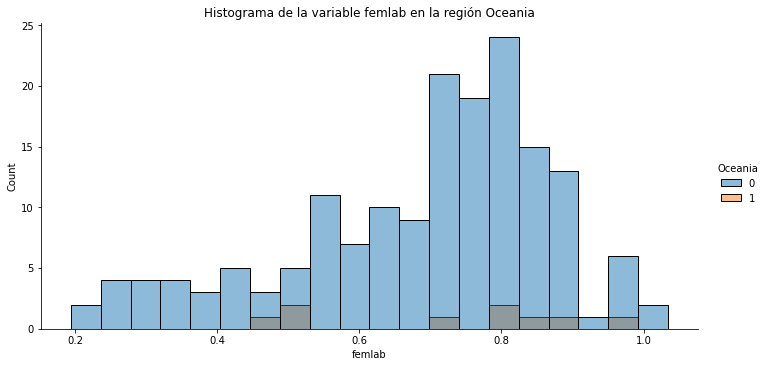

In [8]:
graficar_hist_clase(df_nuevo,'femlab',region)
    

#### Análisis de variable "literacy", que corresponde a la tasa de alfabetismo

In [9]:
for region in df_nuevo.region.unique():
    test_hipotesis(df_nuevo,'literacy',region)
    print('------------\n')

La media de la variable literacy en la región Africa es 65.31
La media de la variable literacy fuera de la región Africa es 90.20
La diferencia entre las medias es 24.89
El p-value es 0.00000000%
El t-statistic es -8.90999117
------------

La media de la variable literacy en la región Americas es 89.30
La media de la variable literacy fuera de la región Americas es 80.18
La diferencia entre las medias es 9.12
El p-value es 5.28229703%
El t-statistic es 1.95380555
------------

La media de la variable literacy en la región Asia es 87.36
La media de la variable literacy fuera de la región Asia es 78.99
La diferencia entre las medias es 8.36
El p-value es 2.11144608%
El t-statistic es 2.33362795
------------

La media de la variable literacy en la región Europe es 98.18
La media de la variable literacy fuera de la región Europe es 78.29
La diferencia entre las medias es 19.88
El p-value es 0.00059356%
El t-statistic es 4.71843150
------------

La media de la variable literacy en la región

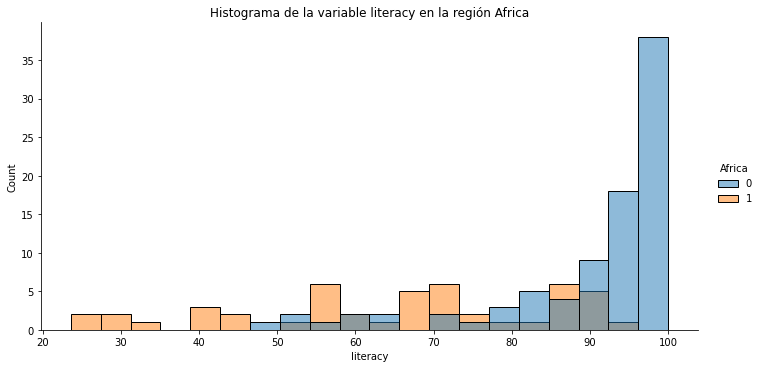

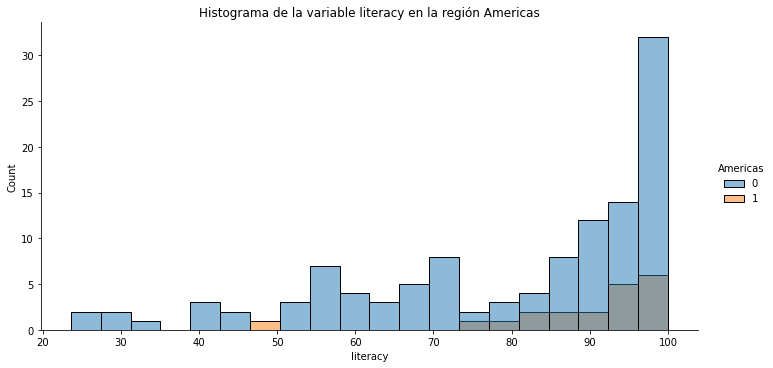

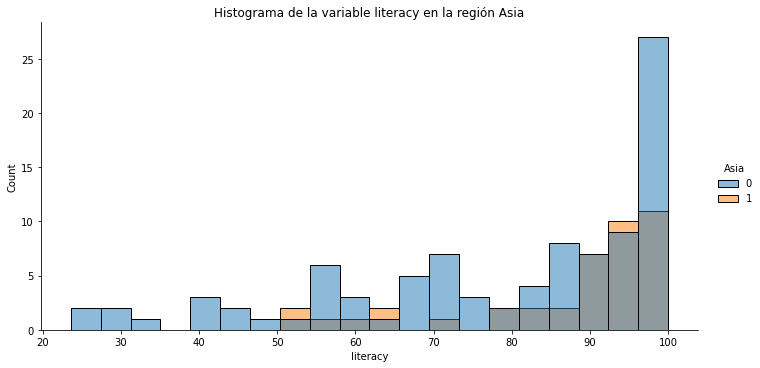

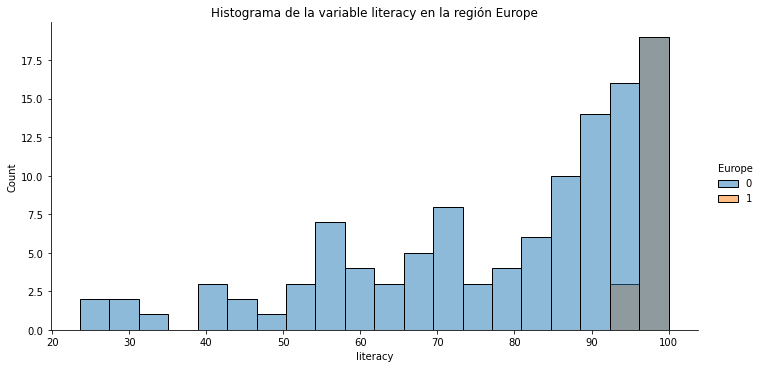

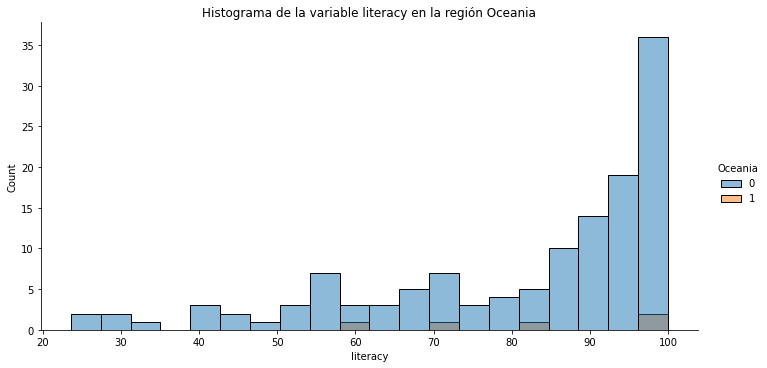

In [10]:
for region in df_nuevo.region.unique():
    graficar_hist_clase(df_nuevo,'literacy',region)

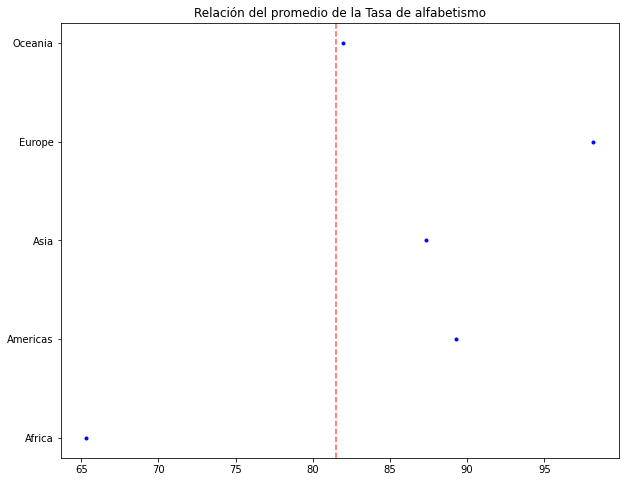

In [11]:
plt.figure(figsize=(10,8))
plt.title('Relación del promedio de la Tasa de alfabetismo')
plt.plot(df_nuevo.groupby('region')['literacy'].mean(),df_nuevo.groupby('region')['literacy'].mean().index , '.', color = 'blue')
plt.axvline(df_nuevo['literacy'].mean(), color = 'tomato', linestyle ='--');

Análisis variable "literacy": La región de África y Europa, si bien son opuestos en su grado de alfabetismo, comparten su equidistancia del promedio  
 mundial de éste, presentándose como los outlayers de esta métrica. A diferencia de Oceanía que se encuentra muy cercana   
 la media, y las regiones de Asia y las Américas muestran una realidad similar en alfabetismo.  

#### Análisis de variable "school", que corresponde al promedio de años de escolaridad

In [16]:
for region in df_nuevo.region.unique():
    test_hipotesis(df_nuevo,'school',region)
    print('------------\n')

La media de la variable school en la región Africa es 4.52
La media de la variable school fuera de la región Africa es 8.55
La diferencia entre las medias es 4.03
El p-value es 0.00000000%
El t-statistic es -10.41581183
------------

La media de la variable school en la región Americas es 8.07
La media de la variable school fuera de la región Americas es 7.32
La diferencia entre las medias es 0.75
El p-value es 17.45846499%
El t-statistic es 1.36282717
------------

La media de la variable school en la región Asia es 7.26
La media de la variable school fuera de la región Asia es 7.53
La diferencia entre las medias es 0.27
El p-value es 59.23313579%
El t-statistic es -0.53638800
------------

La media de la variable school en la región Europe es 10.42
La media de la variable school fuera de la región Europe es 6.63
La diferencia entre las medias es 3.79
El p-value es 0.00000000%
El t-statistic es 8.52434622
------------

La media de la variable school en la región Oceania es 8.72
La med

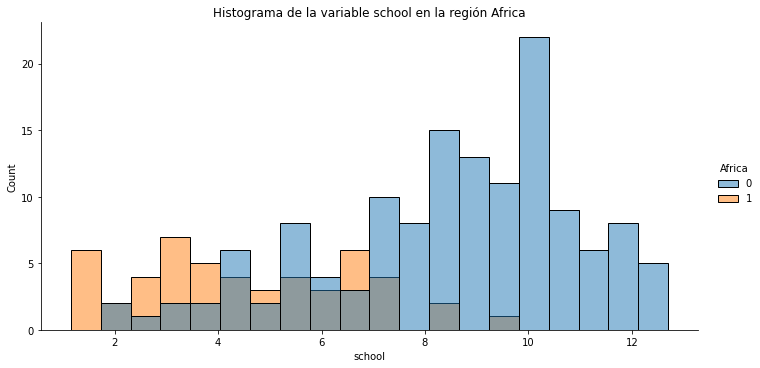

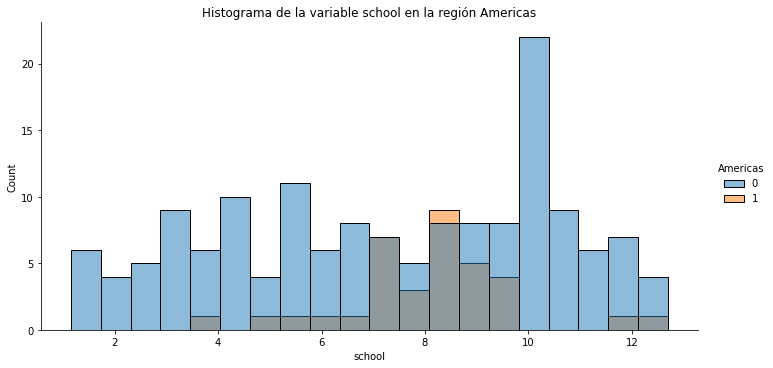

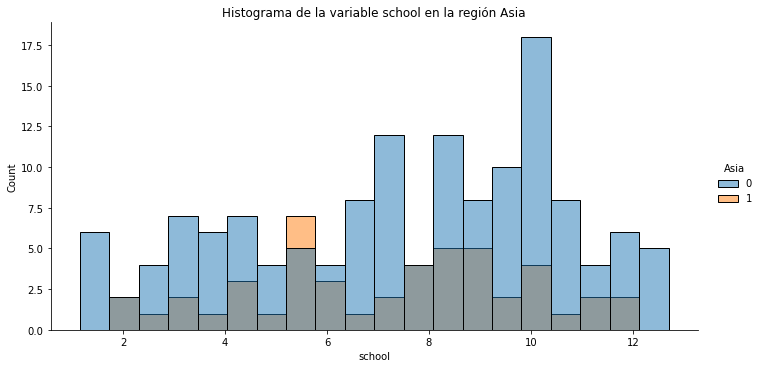

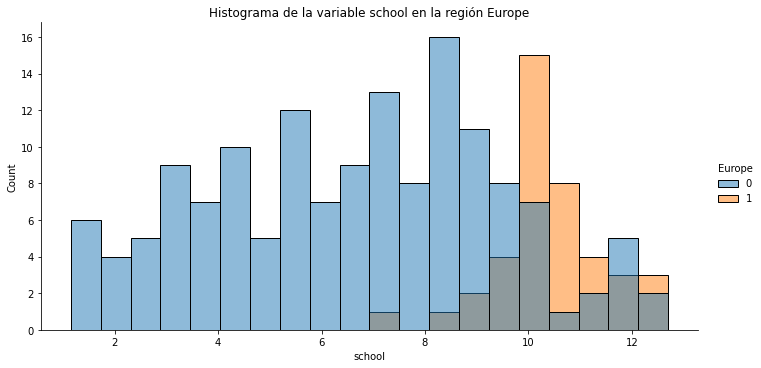

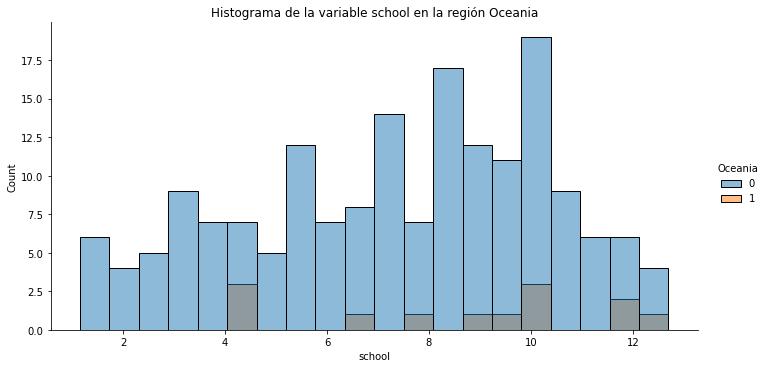

In [18]:
for region in df_nuevo.region.unique():
    graficar_hist_clase(df_nuevo,'school',region)

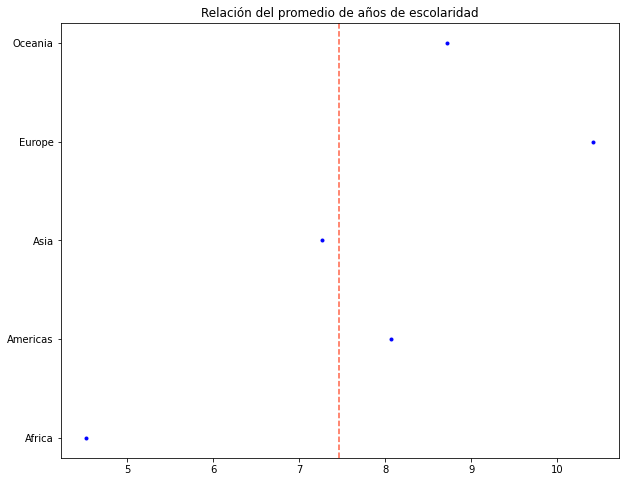

In [19]:
plt.figure(figsize=(10,8))
plt.title('Relación del promedio de años de escolaridad')
plt.plot(df_nuevo.groupby('region')['school'].mean(),df_nuevo.groupby('region')['school'].mean().index , '.', color = 'blue')
plt.axvline(df_nuevo['school'].mean(), color = 'tomato', linestyle ='--');

Análisis variable "school": esta variable presenta un comportamiento similar a la variable "literacy, se puede observar que en los extremos (y equidistantes)   
se encuentran Africa y Europa, con el promedio más bajo y mas alto de  escolaridad respectivamente, mientras que cercanos al promedio mundial, nuevamente  
se posiciona las regiones de Asia, America y Oceania, con Asia levemente bajo el promedio.

#### Análisis de variable "femlab", que corresponde al promedio de años de escolaridad

In [23]:
for region in df_nuevo.region.unique():
    test_hipotesis(df_nuevo,'femlab',region)
    print('------------\n')

La media de la variable femlab en la región Africa es 0.73
La media de la variable femlab fuera de la región Africa es 0.68
La diferencia entre las medias es 0.05
El p-value es 7.61771840%
El t-statistic es 1.78387288
------------

La media de la variable femlab en la región Americas es 0.65
La media de la variable femlab fuera de la región Americas es 0.70
La diferencia entre las medias es 0.05
El p-value es 17.14745430%
El t-statistic es -1.37311134
------------

La media de la variable femlab en la región Asia es 0.61
La media de la variable femlab fuera de la región Asia es 0.72
La diferencia entre las medias es 0.11
El p-value es 0.02441326%
El t-statistic es -3.74551966
------------

La media de la variable femlab en la región Europe es 0.77
La media de la variable femlab fuera de la región Europe es 0.67
La diferencia entre las medias es 0.10
El p-value es 0.25335605%
El t-statistic es 3.06352376
------------

La media de la variable femlab en la región Oceania es 0.72
La media 

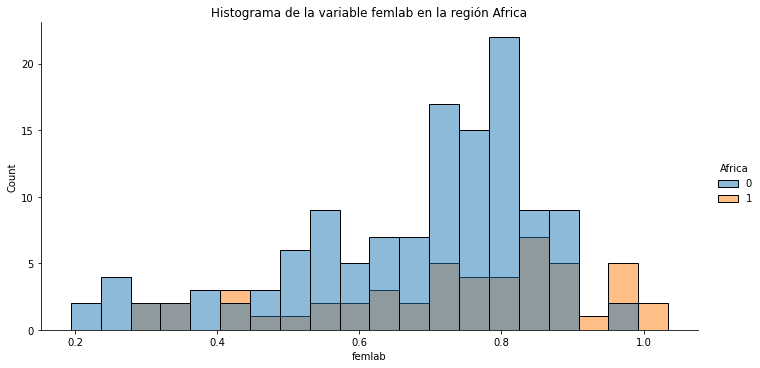

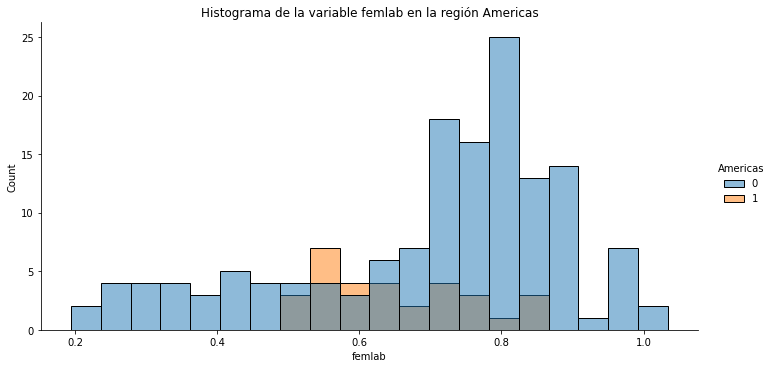

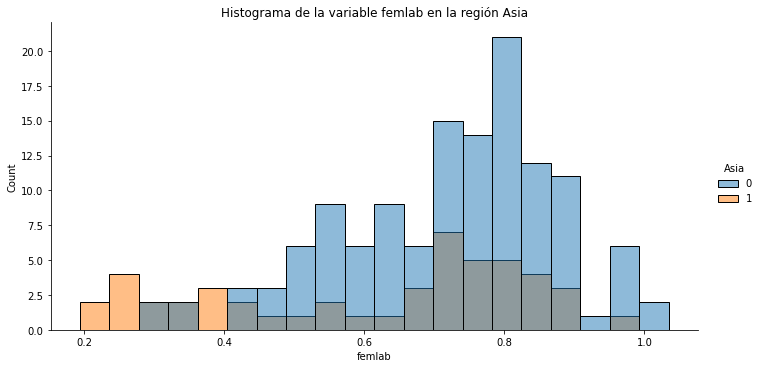

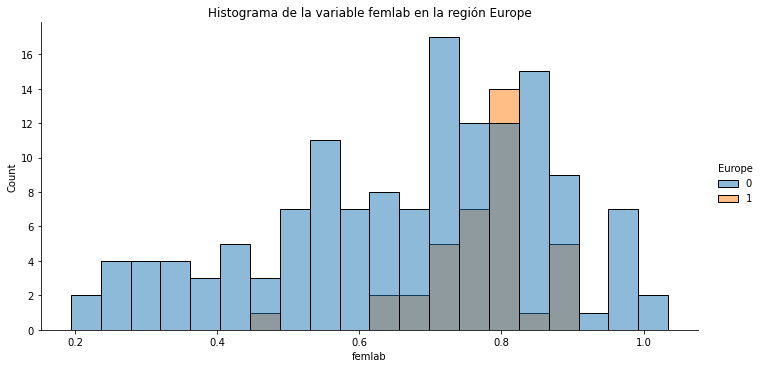

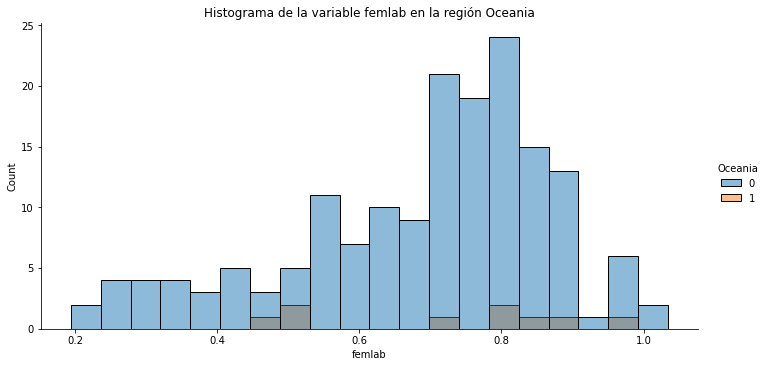

In [24]:
for region in df_nuevo.region.unique():
    graficar_hist_clase(df_nuevo,'femlab',region)

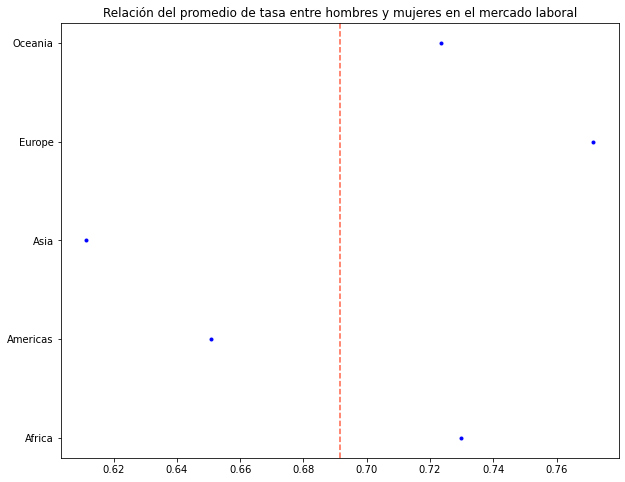

In [25]:
plt.figure(figsize=(10,8))
plt.title('Relación del promedio de tasa entre hombres y mujeres en el mercado laboral')
plt.plot(df_nuevo.groupby('region')['femlab'].mean(),df_nuevo.groupby('region')['femlab'].mean().index , '.', color = 'blue')
plt.axvline(df_nuevo['femlab'].mean(), color = 'tomato', linestyle ='--');

Análisis variable "femlab": según el gráfico dotplot, se observa que existe una diferencia apreciable entre todos los continentes en cuanto a la variable Femlab. Asia es el continente menor cantidad   
de mujeres empleadas, mientras que Europa es el continente con mayor cantidad de mujeres empleadas. Ambos continentes se ubican considerablemente lejos de la media por lo que podría concluirse que   
corresponden a casos especiales que se salen de la norma. Esto se puede complementar mirando el resultado de los test de hipótesis de ambos continentes que entregan un p-value de  0.02441326% y 0.253% lo     
que indican que se rechaza la hipótesis nula que indica que la variable femlab en estos continentes sería igual que en el resto del mundo.    